# MobileNet Sign Language

In [1]:
#%cd Sign-Language-Digits-Dataset
#%mkdir train
#%mkdir valid
#%mkdir test


/Users/svidhya/Desktop/Adithya/Projects/JupyterStuff/Sign-Language-Digits-Dataset
mkdir: train: File exists
mkdir: valid: File exists
mkdir: test: File exists


In [10]:
#%mv /0 /1 /2 /3 /4 /5 /6 /7 /8 /9 train/

mv: rename /0 to train/0: No such file or directory
mv: rename /1 to train/1: No such file or directory
mv: rename /2 to train/2: No such file or directory
mv: rename /3 to train/3: No such file or directory
mv: rename /4 to train/4: No such file or directory
mv: rename /5 to train/5: No such file or directory
mv: rename /6 to train/6: No such file or directory
mv: rename /7 to train/7: No such file or directory
mv: rename /8 to train/8: No such file or directory
mv: rename /9 to train/9: No such file or directory


In [13]:
#%pwd

'/Users/svidhya/Desktop/Adithya/Projects/JupyterStuff/Sign-Language-Digits-Dataset/valid'

In [1]:
%pwd

'/Users/svidhya/Desktop/Adithya/Projects/JupyterStuff'

Get data random from train, and make validation and test sets

In [2]:
"""%%bash
cd ../train
for ((i=0; i<=9; i++)); do
    a=$(find $i/ -type f | shuf -n 30)
    mv $a ../valid/$i/
    b=$(find $i/ -type f | shuf -n 5)
    mv $b ../test/$i/
done"""

'%%bash\ncd ../train\nfor ((i=0; i<=9; i++)); do\n    a=$(find $i/ -type f | shuf -n 30)\n    mv $a ../valid/$i/\n    b=$(find $i/ -type f | shuf -n 5)\n    mv $b ../test/$i/\ndone'

In [10]:
#%cd ../..
%cd ..

/Users/svidhya/Desktop/Adithya/Projects/JupyterStuff


## Build Sign Language Model

In [3]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.applications import imagenet_utils
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
train_path = 'Sign-Language-Digits-Dataset/train'
test_path = 'Sign-Language-Digits-Dataset/test'
valid_path = 'Sign-Language-Digits-Dataset/valid'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
mobile = keras.applications.mobilenet.MobileNet()

In [7]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [8]:
x = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(x)

In [9]:
model = Model(inputs=mobile.input, outputs=predictions)

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [11]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [12]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit_generator(train_batches, steps_per_epoch=18,
                   validation_data=valid_batches, validation_steps=3, epochs=60, verbose=2)

Epoch 1/60
 - 35s - loss: 2.3733 - accuracy: 0.1944 - val_loss: 2.2170 - val_accuracy: 0.4000
Epoch 2/60
 - 28s - loss: 1.2482 - accuracy: 0.6000 - val_loss: 1.3848 - val_accuracy: 0.3000
Epoch 3/60
 - 28s - loss: 0.9253 - accuracy: 0.7278 - val_loss: 3.0609 - val_accuracy: 0.4333
Epoch 4/60
 - 28s - loss: 0.7389 - accuracy: 0.7944 - val_loss: 2.1553 - val_accuracy: 0.3000
Epoch 5/60
 - 27s - loss: 0.7072 - accuracy: 0.7849 - val_loss: 1.5986 - val_accuracy: 0.2333
Epoch 6/60
 - 28s - loss: 0.5049 - accuracy: 0.8500 - val_loss: 1.4167 - val_accuracy: 0.5000
Epoch 7/60
 - 28s - loss: 0.4308 - accuracy: 0.8889 - val_loss: 1.8899 - val_accuracy: 0.4667
Epoch 8/60
 - 28s - loss: 0.4702 - accuracy: 0.8611 - val_loss: 1.2040 - val_accuracy: 0.6333
Epoch 9/60
 - 28s - loss: 0.3453 - accuracy: 0.9389 - val_loss: 1.3607 - val_accuracy: 0.6000
Epoch 10/60
 - 27s - loss: 0.4563 - accuracy: 0.8895 - val_loss: 0.7341 - val_accuracy: 0.7667
Epoch 11/60
 - 28s - loss: 0.2325 - accuracy: 0.9667 - val_

## Testing/Predicting

In [14]:
test_labels = test_batches.classes

In [15]:
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

In [16]:
predictions = model.predict_generator(test_batches, steps=5, verbose=0)

In [17]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [18]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [19]:
def plot_confusion_matrix(cm, y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 1 0 0 0 0 0 3 1 0]
 [0 0 0 0 0 0 0 1 0 4]]


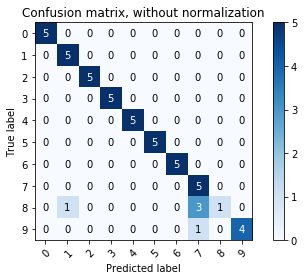

In [20]:
plot_confusion_matrix(cm, test_labels, predictions.argmax(axis=1), cm_plot_labels)

## Save Model

In [21]:
model.save('sign_language_digits.h5')

In [22]:
%pwd

'/Users/svidhya/Desktop/Adithya/Projects/JupyterStuff'